In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import GridSearchCV
#from sklearn import preprocessing

In [47]:
wine_ds = pd.read_csv('winedataset.csv')
wine_ds

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [48]:
wine_ds['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [49]:
wine_ds.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [50]:
wine_ds.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


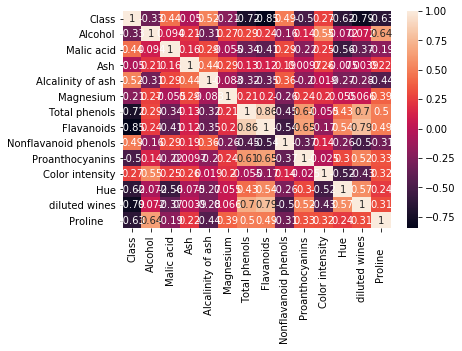

In [51]:
sns.heatmap(wine_ds.corr(), annot=True)
plt.show()

In [52]:
wine_ds.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [53]:
wine_ds.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [54]:
wine_ds.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

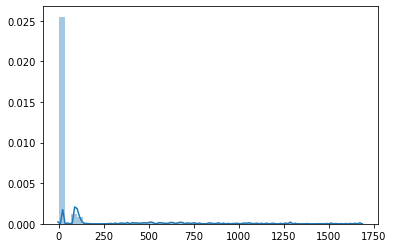

In [55]:
sns.distplot(wine_ds, kde=True)
plt.show()

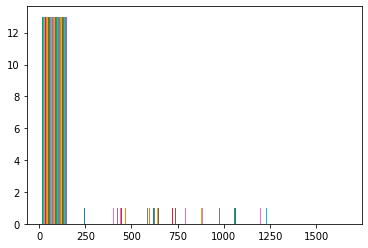

In [56]:
plt.hist(wine_ds)
plt.show()

In [57]:
# Remove skewness 
for col in wine_ds.columns:
    if wine_ds.skew().loc[col] > 0.55:
        wine_ds[col] = np.log1p(wine_ds[col])


In [58]:
wine_ds.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.605723
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.097222
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.087930
dtype: float64

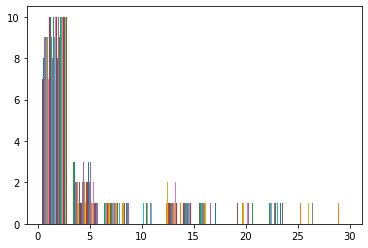

In [59]:
plt.hist(wine_ds)
plt.show()

In [60]:
# Remove skewness 
for col in wine_ds.columns:
    if wine_ds.skew().loc[col] > 0.55:
        wine_ds[col] = np.log1p(wine_ds[col])

In [61]:
wine_ds.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.527327
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.097222
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.087930
dtype: float64

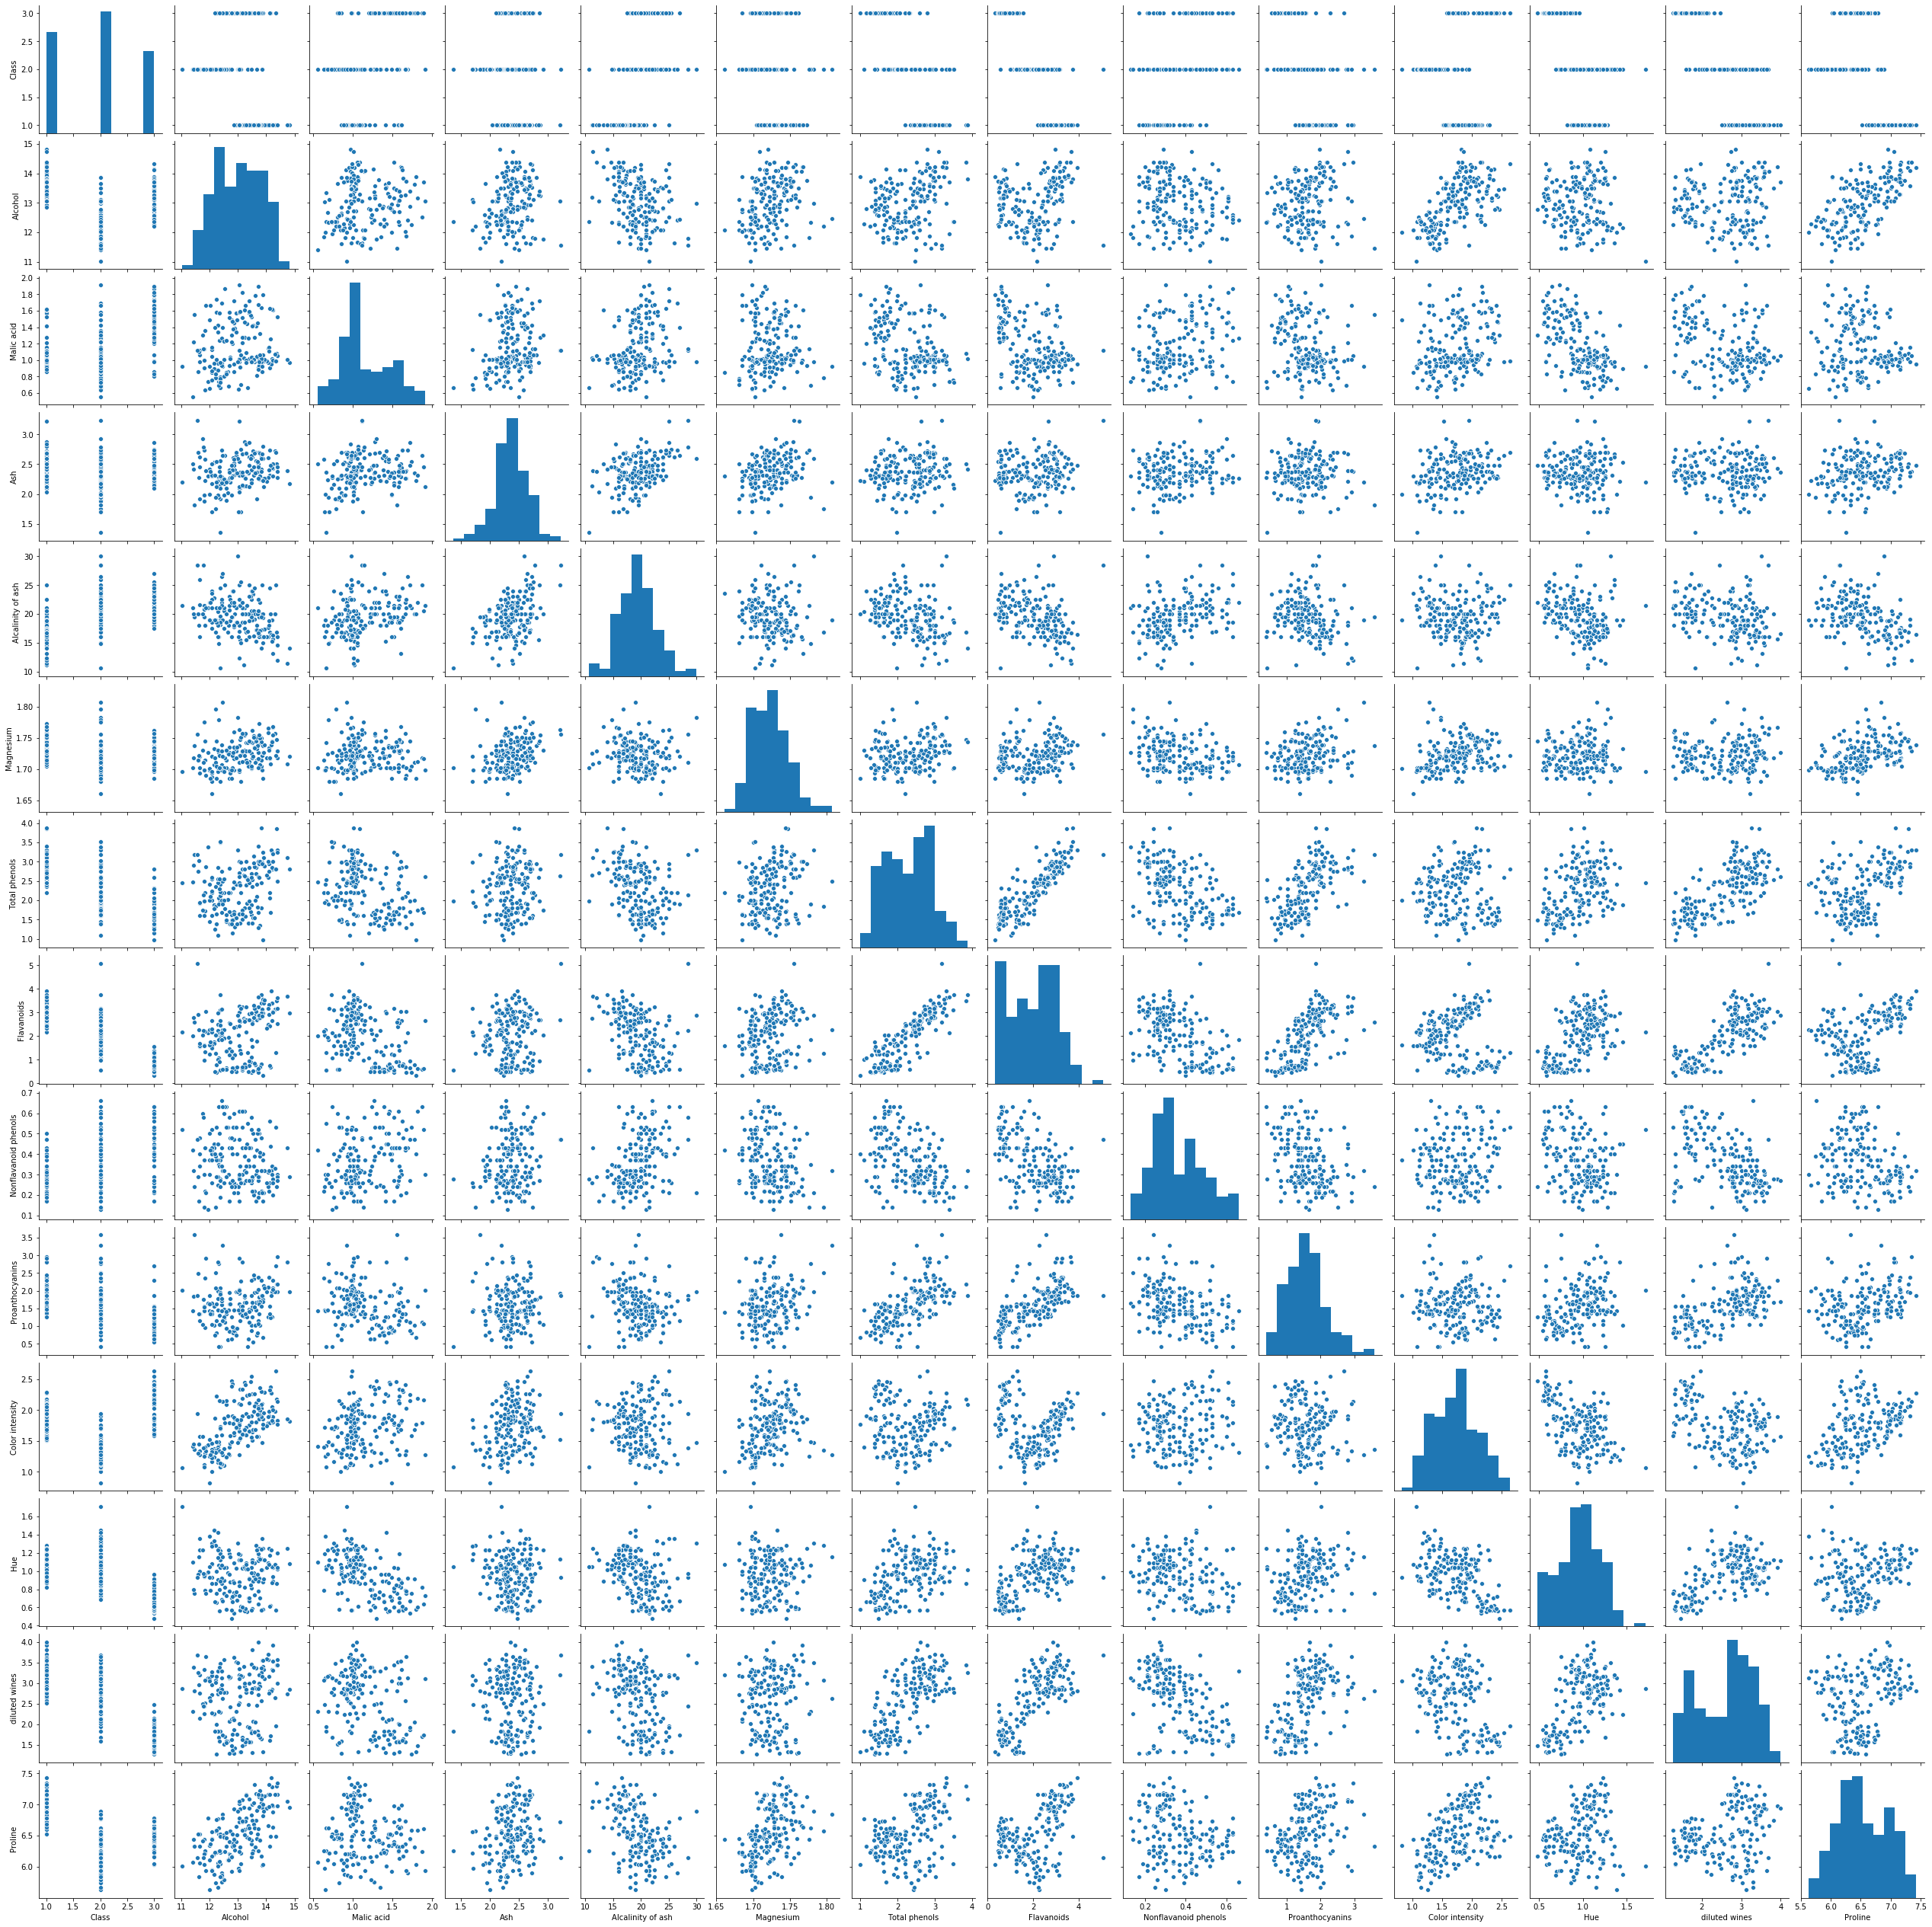

In [62]:
sns.pairplot(wine_ds)
plt.show()

In [63]:
from scipy.stats import zscore
z_score = abs(zscore(wine_ds))
print (wine_ds.shape)

wine_ds_final = wine_ds.loc[(z_score < 3).all(axis=1)]
print (wine_ds_final.shape)

(178, 14)
(170, 14)


In [64]:
#Separatomg target and input variables

df_x = wine_ds_final.drop(columns=['Class'])
y = wine_ds_final['Class']

In [65]:
df_x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,0.996949,2.43,15.6,1.766789,2.80,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
1,13.20,1.022451,2.14,11.2,1.725463,2.65,2.76,0.26,1.28,1.682688,1.05,3.40,6.957497
2,13.16,1.211941,2.67,18.6,1.727216,2.80,3.24,0.30,2.81,1.899118,1.03,3.17,7.078342
3,14.37,1.081805,2.50,16.8,1.746797,3.85,3.49,0.24,2.18,2.174752,0.86,3.45,7.300473
4,13.24,1.278152,2.87,21.0,1.754252,2.80,2.69,0.39,1.82,1.671473,1.04,2.93,6.601230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.894617,2.45,20.5,1.716380,1.68,0.61,0.52,1.06,2.163323,0.64,1.74,6.608001
174,13.40,1.591274,2.48,23.0,1.728949,1.80,0.75,0.43,1.41,2.116256,0.70,1.56,6.621406
175,13.27,1.663926,2.26,20.0,1.757132,1.59,0.69,0.43,1.35,2.415914,0.59,1.56,6.728629
176,13.17,1.278152,2.37,20.0,1.757132,1.65,0.68,0.53,1.46,2.332144,0.60,1.62,6.734592


In [66]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 170, dtype: int64

In [67]:
# Scaling the input variables
# Liner Algorithm feature requires that all varibales should be on common scale


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns = df_x.columns)

In [68]:
x.skew()

Alcohol                -0.030651
Malic acid              0.510074
Ash                    -0.243064
Alcalinity of ash       0.094425
Magnesium               0.216730
Total phenols           0.111388
Flavanoids             -0.076427
Nonflavanoid phenols    0.474603
Proanthocyanins         0.354703
Color intensity         0.063903
Hue                    -0.121305
diluted wines          -0.279718
Proline                 0.081052
dtype: float64

In [69]:
x.shape

(170, 13)

In [70]:
y.shape

(170,)

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = .22)

In [72]:
x_train.shape

(132, 13)

In [73]:
y_train.shape

(132,)

In [74]:
x_test.shape

(38, 13)

In [75]:
y_test.shape

(38,)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [77]:
KNN = KNeighborsClassifier()
sv = SVC()
DT = DecisionTreeClassifier(random_state = 6)


In [78]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', sv))
models.append(('DecisionTreeClassifier', DT))

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

*************************** KNeighborsClassifier ****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy score:  0.9736842105263158


Cross_Val_Score =  0.9529411764705882


[0.         0.40909091 1.         1.        ] [0. 0. 0. 1.] [4 3 2 1]
RUC_AUC_Score:  0.0


classification_report:
                precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38




Confusion matrix:  [[16  0  0]
 [ 0 13  1]
 [ 0  0  8]]





*************************** SVC ****************************


SVC(C=1.0, break_ties=False,

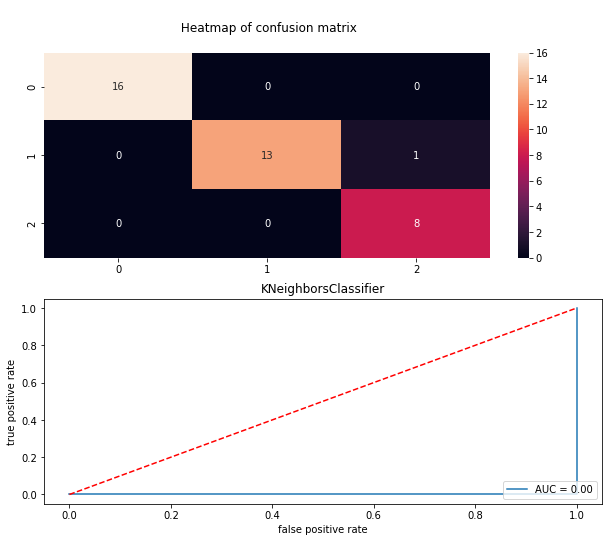

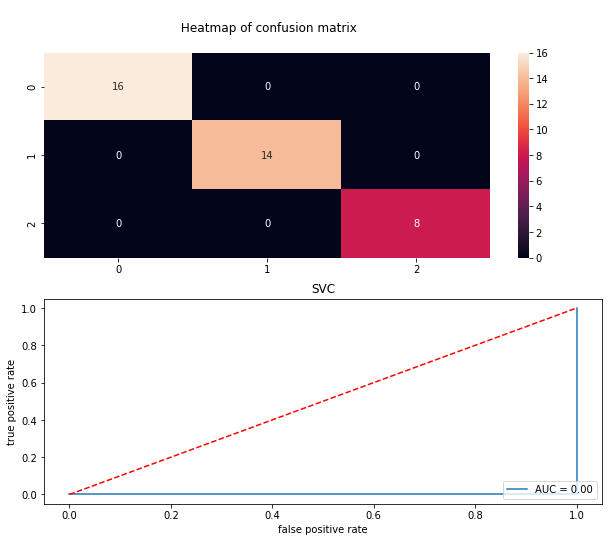

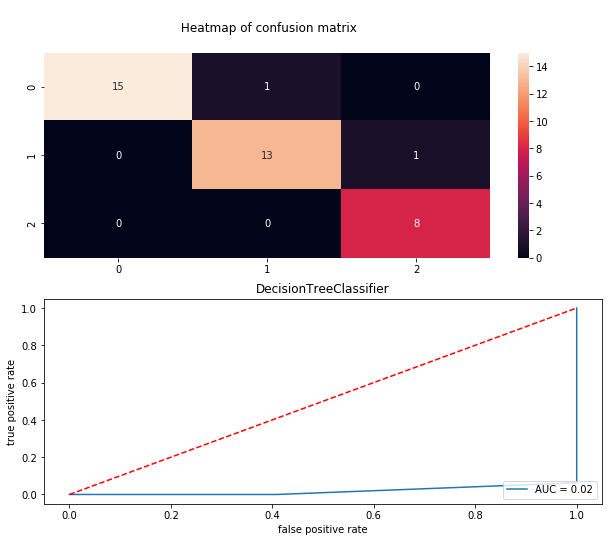

In [80]:
Model = []
score = []
cvs = []
rocscore = []

for name, model in models:
    
    print ('***************************',name,'****************************')
    print ('\n')
    
    Model.append(name)
    model.fit(x_train, y_train)
    print (model)
    pre = model.predict(x_test)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append(AS*100)
    print ("\n")
    
    sc = cross_val_score(model, x ,y, cv=10, scoring='accuracy').mean()
    print ("Cross_Val_Score = ", sc) 
    cvs.append(sc*100)
    print ("\n")
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (false_positive_rate, true_positive_rate, thresholds)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('RUC_AUC_Score: ', roc_auc)
    rocscore.append(roc_auc*100)
    print ("\n")

    
    print ("classification_report:\n ", classification_report(y_test, pre))
    print ("\n")
    cm = confusion_matrix(y_test, pre)
    print ('\nConfusion matrix: ', confusion_matrix(y_test, pre))
    print ("\n")
    
    plt.figure(figsize=(10, 40))
    plt.subplot(911)
    plt.title("\n Heatmap of confusion matrix\n")
    sns.heatmap(cm, annot=True)
    
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'%(roc_auc))
    plt.plot([0,1], [0,1], 'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    print ('\n\n')

In [81]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_Val_Score': cvs, 'ROC_Auc_Curve': rocscore})
result

,Model,Accuracy_score,Cross_Val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,97.368421,95.294118,0.000000
1,SVC,100.000000,98.235294,0.000000
2,DecisionTreeClassifier,94.736842,87.058824,1.846591


In [83]:
params = {'kernel': ['linear', 'poly', 'rbf']}
grid = GridSearchCV(sv, param_grid=params, cv=10, scoring='accuracy')
grid.fit(x,y)
print ("Best Params: ", grid.best_params_)
print ("Best Scores: ", grid.best_score_)

Best Params:  {'kernel': 'rbf'}
Best Scores:  0.9823529411764707


In [ ]:
 from sklearn.externals import joblib

In [ ]:
from joblib import dump, load

In [ ]:
dump(sv, 'Wine_result.joblib')

In [ ]:
clf = load('Wine_result.joblib')


In [ ]:
clf

In [89]:
sv.predict(x_test)

array([3, 1, 2, 1, 3, 3, 3, 1, 2, 2, 1, 3, 3, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 2, 2, 3, 1, 2], dtype=int64)